In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.font_manager as fm

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_curve, auc, precision_recall_curve, confusion_matrix,
                           classification_report, average_precision_score)
from sklearn.calibration import calibration_curve 
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import VotingClassifier

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.font_manager as fm
from sklearn.preprocessing import LabelEncoder
# 1. 설치된 한글 폰트 확인
fonts = [f.name for f in fm.fontManager.ttflist]
print('설치된 폰트 목록:', fonts)

# 2. 한글 폰트 설정 (아래 폰트 중 하나 선택)
plt.rc('font', family='Malgun Gothic')  # 맑은 고딕
# plt.rc('font', family='NanumGothic')  # 나눔고딕
# plt.rc('font', family='NanumBarunGothic')  # 나눔바른고딕

# 3. 마이너스 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)

설치된 폰트 목록: ['STIXSizeOneSym', 'DejaVu Sans Mono', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'cmr10', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'STIXSizeThreeSym', 'STIXSizeOneSym', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'STIXSizeTwoSym', 'STIXGeneral', 'cmmi10', 'DejaVu Serif', 'cmss10', 'cmtt10', 'cmb10', 'STIXGeneral', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'STIXGeneral', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Sans', 'cmex10', 'cmsy10', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXSizeTwoSym', 'STIXSizeFiveSym', 'STIXNonUnicode', 'DejaVu Serif Display', 'Franklin Gothic Heavy', 'Magic R', 'HYMyeongJo-Extra', 'French Script MT', 'Tw Cen MT Condensed', 'Javanese Text', 'Bodoni MT', 'Arial', 'Segoe UI', 'Segoe UI', 'Bodoni MT', 'HYSinMyeongJo-Medium', 'Comic Sans MS', 'Book Antiqua', 'Segoe MDL2 Assets', 'Leelawadee', 'Webdings', 'Wingdings', 'Poor Richard', 'Bodoni MT', 'Franklin Gothic Book', 'Eras Demi ITC', 'Leela

In [3]:
cd ../

c:\Users\okpl8\Documents\project_LG\src


In [4]:
cd ../

c:\Users\okpl8\Documents\project_LG


In [5]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.head()

,ID,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRAIN_000000,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRAIN_000001,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRAIN_000002,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRAIN_000003,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRAIN_000004,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

In [7]:
train.describe()


,임신 시도 또는 마지막 임신 경과 연수,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
count,9370.000000,256351.000000,250060.000000,2718.0,250060.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,...,250060.000000,250060.000000,2179.0,1929.0,198863.0,1436.000000,202616.000000,212785.000000,40369.000000,256351.000000
mean,9.270651,0.771286,0.233476,1.0,0.012781,0.028516,0.013115,0.030724,0.012432,0.033068,...,0.009830,0.004195,1.0,1.0,0.0,0.001393,0.005385,3.254741,0.045629,0.258349
std,3.550313,0.420005,0.423043,0.0,0.112328,0.166441,0.113767,0.172568,0.110805,0.178814,...,0.098656,0.064633,0.0,0.0,0.0,0.037307,0.111504,1.715697,0.418672,0.437728
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,2.000000,0.000000,0.000000
50%,9.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,3.000000,0.000000,0.000000
75%,11.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,5.000000,0.000000,1.000000
max,20.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,0.0,1.000000,7.000000,7.000000,7.000000,1.000000


In [8]:
train = train.drop(['ID'], axis=1)
test = test.drop(['ID'], axis=1)
train.head()

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


In [9]:
# obj중 알수없음이 많은것은 없앰, 결측치 비율이 많은것도 제외외
train = train.drop(['배란 유도 유형', '난자 기증자 나이', '정자 기증자 나이', '임신 시도 또는 마지막 임신 경과 연수', '착상 전 유전 검사 사용 여부', 'PGD 시술 여부', 'PGS 시술 여부','난자 해동 경과일','배아 해동 경과일' ], axis=1)
train.head()
test = test.drop(['배란 유도 유형', '난자 기증자 나이', '정자 기증자 나이', '임신 시도 또는 마지막 임신 경과 연수', '착상 전 유전 검사 사용 여부', 'PGD 시술 여부', 'PGS 시술 여부','난자 해동 경과일','배아 해동 경과일' ], axis=1)
test.head()

,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,...,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,난자 채취 경과일,난자 혼합 경과일,배아 이식 경과일
0,TRYBLT,만35-37세,IVF,IVF,1,0.0,0.0,0,0,0,...,0.0,본인 제공,배우자 제공,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1,TRDQAZ,만18-34세,IVF,IVF,1,0.0,0.0,0,0,0,...,1.0,본인 제공,기증 제공,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2,TRCMWS,만40-42세,IVF,ICSI,1,0.0,0.0,0,0,0,...,0.0,본인 제공,배우자 제공,0.0,1.0,0.0,0.0,0.0,0.0,3.0
3,TRJXFG,만40-42세,IVF,ICSI,1,0.0,0.0,0,0,0,...,0.0,본인 제공,배우자 제공,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,TRJXFG,만35-37세,IVF,ICSI,1,0.0,0.0,0,0,0,...,0.0,본인 제공,배우자 제공,0.0,1.0,0.0,0.0,0.0,0.0,5.0


In [10]:
#인코딩
label_cols = ['총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수','DI 시술 횟수', '총 임신 횟수',
              'IVF 임신 횟수','시술 시기 코드','시술 당시 나이', "시술 유형", "난자 출처", "정자 출처",
              'DI 임신 횟수','총 출산 횟수','IVF 출산 횟수','DI 출산 횟수']
le = LabelEncoder()
for col in label_cols:
    train[col] = le.fit_transform(train[col])  # train에 fit
    test[col] = le.transform(test[col])  # test에는 transform만 적용


In [11]:
# 배아 생성 주요 이유 그룹화 함수
def categorize_embryo_reason(x):
    if "현재 시술용" in x:
        return "Current"
    elif "배아 저장용" in x:
        return "Storage"
    elif "기증용" in x:
        return "Donation"
    elif "난자 저장용" in x:
        return "Egg Storage"
    elif "연구용" in x:
        return "Research"
    else:
        return "Unknown"

# ✅ 결측값 처리 및 그룹화 적용 (train)
train["배아 생성 주요 이유"] = train["배아 생성 주요 이유"].fillna("Unknown").astype(str)
train["배아 생성 주요 이유"] = train["배아 생성 주요 이유"].apply(categorize_embryo_reason)

# ✅ 결측값 처리 및 그룹화 적용 (test)
test["배아 생성 주요 이유"] = test["배아 생성 주요 이유"].fillna("Unknown").astype(str)
test["배아 생성 주요 이유"] = test["배아 생성 주요 이유"].apply(categorize_embryo_reason)

# ✅ **단 하나의 LabelEncoder 사용 (Data Leakage 방지)**
le = LabelEncoder()
train["배아 생성 주요 이유"] = le.fit_transform(train["배아 생성 주요 이유"])  # fit + transform

# ✅ **test에는 `fit()` 없이 `transform()`만 적용**
test["배아 생성 주요 이유"] = le.transform(test["배아 생성 주요 이유"])  # transform only



In [12]:
# 특정 시술 유형 컬럼의 결측값을 'Unknown'으로 대체
train["특정 시술 유형"] = train["특정 시술 유형"].fillna("Unknown").astype(str)
test["특정 시술 유형"] = test["특정 시술 유형"].fillna("Unknown").astype(str)

# 특정 시술 유형 그룹화 함수
def categorize_treatment(x):
    if "IVF" in x:
        return "IVF"
    elif "ICSI" in x:
        return "ICSI"
    elif "IUI" in x or "ICI" in x:
        return "IUI"
    else:
        return "Unknown"

# ✅ 그룹화 적용 (train & test)
train["특정 시술 유형"] = train["특정 시술 유형"].apply(categorize_treatment)
test["특정 시술 유형"] = test["특정 시술 유형"].apply(categorize_treatment)

# ✅ Label Encoding (Data Leakage 방지)
le = LabelEncoder()
train["특정 시술 유형"] = le.fit_transform(train["특정 시술 유형"])  # train에서 `fit_transform()`

# ✅ test에서는 `transform()`만 적용
test["특정 시술 유형"] = le.transform(test["특정 시술 유형"])  # test에서는 `fit()`을 수행하지 않음


In [13]:
# 1️⃣ 중앙값 대체 (연속형 변수)
median_cols = ["난자 채취 경과일", "난자 혼합 경과일", "배아 이식 경과일"]
for col in median_cols:
    median_value = train[col].median()  # 🚨 Train 데이터의 중앙값 저장
    train[col].fillna(median_value, inplace=True)
    test[col].fillna(median_value, inplace=True)  # 🚨 Test 데이터도 Train 중앙값으로 채움

# 2️⃣ 평균값 대체 (연속형 변수, 결측 비율 낮음)
mean_cols = ["저장된 신선 난자 수", "기증 배아 사용 여부", "신선 배아 사용 여부", "동결 배아 사용 여부",
             "기증자 정자와 혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "혼합된 난자 수",
             "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부", "해동 난자 수", "해동된 배아 수",
             "미세주입 후 저장된 배아 수", "저장된 배아 수", "미세주입 배아 이식 수", "이식된 배아 수",
             "미세주입에서 생성된 배아 수", "미세주입된 난자 수", "총 생성 배아 수", "수집된 신선 난자 수"]
for col in mean_cols:
    mean_value = train[col].mean()  # 🚨 Train 데이터의 평균값 저장
    train[col].fillna(mean_value, inplace=True)
    test[col].fillna(mean_value, inplace=True)  # 🚨 Test 데이터도 Train 평균값으로 채움

# 3️⃣ 최빈값(Mode) 대체 (범주형 변수)
mode_cols = ["대리모 여부"]
for col in mode_cols:
    mode_value = train[col].mode()[0]  # 🚨 Train 데이터의 최빈값 저장
    train[col].fillna(mode_value, inplace=True)
    test[col].fillna(mode_value, inplace=True)  # 🚨 Test 데이터도 Train 최빈값으로 채움



C:\Users\okpl8\AppData\Local\Temp\ipykernel_29172\2632974382.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(median_value, inplace=True)
C:\Users\okpl8\AppData\Local\Temp\ipykernel_29172\2632974382.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [14]:
# 컬럼 합칠수있는것 합치기
train["IVF 시술 비율"] = train["IVF 시술 횟수"] / (train["총 시술 횟수"] + 1)
train["DI 시술 비율"] = train["DI 시술 횟수"] / (train["총 시술 횟수"] + 1)

train["출산 성공률"] = train["총 출산 횟수"] / (train["총 임신 횟수"] + 1)
train["IVF 출산 비율"] = train["IVF 출산 횟수"] / (train["IVF 임신 횟수"] + 1)
train["DI 출산 비율"] = train["DI 출산 횟수"] / (train["DI 임신 횟수"] + 1)

train["미세주입 성공률"] = train["미세주입에서 생성된 배아 수"] / (train["미세주입된 난자 수"] + 1)
train["이식 성공률"] = train["이식된 배아 수"] / (train["총 생성 배아 수"] + 1)
train["배아 저장률"] = train["저장된 배아 수"] / (train["총 생성 배아 수"] + 1)


# 컬럼 합칠수있는것 합치기
test["IVF 시술 비율"] = test["IVF 시술 횟수"] / (test["총 시술 횟수"] + 1)
test["DI 시술 비율"] = test["DI 시술 횟수"] / (test["총 시술 횟수"] + 1)

test["출산 성공률"] = test["총 출산 횟수"] / (test["총 임신 횟수"] + 1)
test["IVF 출산 비율"] = test["IVF 출산 횟수"] / (test["IVF 임신 횟수"] + 1)
test["DI 출산 비율"] = test["DI 출산 횟수"] / (test["DI 임신 횟수"] + 1)

test["미세주입 성공률"] = test["미세주입에서 생성된 배아 수"] / (test["미세주입된 난자 수"] + 1)
test["이식 성공률"] = test["이식된 배아 수"] / (test["총 생성 배아 수"] + 1)
test["배아 저장률"] = test["저장된 배아 수"] / (test["총 생성 배아 수"] + 1)



In [15]:
# 불임 원인별 숫자로 매핑
infertility_mapping = {
    "남성 요인": 1,
    "난관 질환": 2,
    "배란 장애": 3,
    "자궁경부 문제": 4,
    "자궁내막증": 5,
    "정자 농도 문제": 6,
    "정자 면역 문제": 7,
    "정자 운동성 문제": 8,
    "정자 형태 문제": 9,
    "불명확": 10  # 불명확한 경우 추가
}

# 불임 원인별 숫자로 변환하는 함수
def categorize_infertility(row):
    if row["불임 원인 - 남성 요인"] == 1:
        return 1  # 남성 요인
    elif row["불임 원인 - 난관 질환"] == 1:
        return 2  # 난관 질환
    elif row["불임 원인 - 배란 장애"] == 1:
        return 3  # 배란 장애
    elif row["불임 원인 - 자궁경부 문제"] == 1:
        return 4  # 자궁경부 문제
    elif row["불임 원인 - 자궁내막증"] == 1:
        return 5  # 자궁내막증
    elif row["불임 원인 - 정자 농도"] == 1:
        return 6  # 정자 농도 문제
    elif row["불임 원인 - 정자 면역학적 요인"] == 1:
        return 7  # 정자 면역 문제
    elif row["불임 원인 - 정자 운동성"] == 1:
        return 8  # 정자 운동성 문제
    elif row["불임 원인 - 정자 형태"] == 1:
        return 9  # 정자 형태 문제
    else:
        return 10  # 불명확한 경우

# 새로운 범주형 변수 추가
train["불임 원인 코드"] = train.apply(categorize_infertility, axis=1)

# 기존 불임 관련 컬럼 제거
drop_cols = [
    "불임 원인 - 남성 요인", "불임 원인 - 난관 질환", "불임 원인 - 배란 장애",
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태"
]
train = train.drop(columns=drop_cols)



# 불임 원인별 숫자로 매핑
infertility_mapping = {
    "남성 요인": 1,
    "난관 질환": 2,
    "배란 장애": 3,
    "자궁경부 문제": 4,
    "자궁내막증": 5,
    "정자 농도 문제": 6,
    "정자 면역 문제": 7,
    "정자 운동성 문제": 8,
    "정자 형태 문제": 9,
    "불명확": 10  # 불명확한 경우 추가
}

# 불임 원인별 숫자로 변환하는 함수
def categorize_infertility(row):
    if row["불임 원인 - 남성 요인"] == 1:
        return 1  # 남성 요인
    elif row["불임 원인 - 난관 질환"] == 1:
        return 2  # 난관 질환
    elif row["불임 원인 - 배란 장애"] == 1:
        return 3  # 배란 장애
    elif row["불임 원인 - 자궁경부 문제"] == 1:
        return 4  # 자궁경부 문제
    elif row["불임 원인 - 자궁내막증"] == 1:
        return 5  # 자궁내막증
    elif row["불임 원인 - 정자 농도"] == 1:
        return 6  # 정자 농도 문제
    elif row["불임 원인 - 정자 면역학적 요인"] == 1:
        return 7  # 정자 면역 문제
    elif row["불임 원인 - 정자 운동성"] == 1:
        return 8  # 정자 운동성 문제
    elif row["불임 원인 - 정자 형태"] == 1:
        return 9  # 정자 형태 문제
    else:
        return 10  # 불명확한 경우

# 새로운 범주형 변수 추가
test["불임 원인 코드"] = test.apply(categorize_infertility, axis=1)

# 기존 불임 관련 컬럼 제거
drop_cols = [
    "불임 원인 - 남성 요인", "불임 원인 - 난관 질환", "불임 원인 - 배란 장애",
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태"
]
test = test.drop(columns=drop_cols)



In [16]:
# 다중공선성 확인 (VIF)

X = train.drop(columns=["임신 성공 여부"])  # 타겟 변수 제외
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             Feature           VIF
22          DI 임신 횟수           inf
21         IVF 임신 횟수           inf
20           총 임신 횟수           inf
23           총 출산 횟수  2.582269e+04
24         IVF 출산 횟수  2.402696e+04
25          DI 출산 횟수  1.874608e+03
51            출산 성공률  9.579079e+02
52         IVF 출산 비율  9.242462e+02
43       신선 배아 사용 여부  2.337182e+02
2              시술 유형  1.694705e+02
37          혼합된 난자 수  1.328726e+02
16           총 시술 횟수  1.277453e+02
18         IVF 시술 횟수  1.080033e+02
38  파트너 정자와 혼합된 난자 수  9.180424e+01
53          DI 출산 비율  7.838696e+01
42       동결 배아 사용 여부  4.866639e+01
28   미세주입에서 생성된 배아 수  4.252445e+01
11        부부 주 불임 원인  3.857407e+01
40             난자 출처  3.786808e+01
7         남성 주 불임 원인  3.413989e+01
41             정자 출처  3.387352e+01
27        미세주입된 난자 수  2.867404e+01
26         총 생성 배아 수  2.760766e+01
4           배란 자극 여부  2.464884e+01
29          이식된 배아 수  2.078335e+01
35       수집된 신선 난자 수  1.985396e+01
9         여성 주 불임 원인  1.876459e+01
19          DI 시술 횟수

In [17]:
# 다중공선성이 높은 변수 제거
drop_cols = ["IVF 출산 비율", "DI 출산 비율"]
train = train.drop(columns=drop_cols, errors='ignore')
test = test.drop(columns=drop_cols, errors='ignore')

In [18]:
for feature in ["총 생성 배아 수", "미세주입된 난자 수", "이식된 배아 수", "수집된 신선 난자 수", "IVF 시술 비율"]:
    Q1 = train[feature].quantile(0.25)
    Q3 = train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 제거
    train = train[(train[feature] >= lower_bound) & (train[feature] <= upper_bound)]


In [19]:
train.head()

,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,...,난자 혼합 경과일,배아 이식 경과일,임신 성공 여부,IVF 시술 비율,DI 시술 비율,출산 성공률,미세주입 성공률,이식 성공률,배아 저장률,불임 원인 코드
0,6,0,1,0,1,0.0,0.0,0,0,0,...,0.0,3.0,0,0.0,0.0,0.0,0.666667,0.400000,0.4,1
1,5,5,1,0,0,0.0,0.0,0,0,0,...,0.0,3.0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,10
2,3,0,1,2,1,0.0,0.0,0,0,0,...,0.0,2.0,0,0.5,0.0,0.0,0.000000,0.333333,0.0,1
3,2,1,1,0,1,0.0,0.0,0,0,0,...,0.0,3.0,0,0.5,0.0,0.0,0.000000,0.000000,0.0,1
4,3,0,1,0,1,0.0,0.0,0,0,0,...,0.0,3.0,0,0.0,0.0,0.0,0.857143,0.285714,0.0,2


In [20]:
X = train.drop(['임신 성공 여부'] , axis=1)
Y = train['임신 성공 여부']

print(X.shape)
print(Y.shape)

(245661, 56)
(245661,)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size=0.2, random_state=42, stratify=Y
)

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train
)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(157222, 56)
(49133, 56)
(157222,)
(49133,)
(39306, 56)
(39306,)


In [22]:
# 1️⃣ SMOTE 적용 (1 클래스 샘플 증가)
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # 1 클래스가 0 클래스의 80%가 되도록 증강
X_resampled, y_resampled = smote.fit_resample(X, Y)

# 2️⃣ 언더샘플링 적용 (0 클래스 샘플 감소)
under_sampler = RandomUnderSampler(sampling_strategy="auto", random_state=42)  # 자동 조정
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)

# 데이터 크기 확인
print("After SMOTE + Under-sampling:", pd.Series(y_resampled).value_counts().to_dict())




After SMOTE + Under-sampling: {0: 145801, 1: 145801}


In [23]:
print("X_train shape:", X.shape)
print("Y_train shape:", Y.shape)

print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)


X_train shape: (245661, 56)
Y_train shape: (245661,)
X_resampled shape: (291602, 56)
y_resampled shape: (291602,)


In [24]:
# 모델 정의
models = {
    'Extra Trees': ExtraTreesClassifier(max_depth= None, min_samples_split = 2, n_estimators = 200, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(depth = 10, iterations= 200, learning_rate= 0.1, verbose=0, random_state=42),
    'LightGBM': LGBMClassifier(max_depth=10, learning_rate= 0.1, n_estimators= 200, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(max_depth = 10, learning_rate= 0.1, n_estimators=200, random_state=42, n_jobs=-1),
    'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=200, class_weight="balanced", random_state=42),
}

In [25]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

In [26]:
# ✅ 각 모델별 Test 예측값을 저장할 리스트 (Soft Voting 적용을 위한 확률 평균)
test_predictions = {name: np.zeros((X_test.shape[0], 2)) for name in models.keys() if hasattr(models[name], "predict_proba")}
submission_predictions = {name: np.zeros((test.shape[0], 2)) for name in models.keys() if hasattr(models[name], "predict_proba")}

# ✅ KFold 적용
roc_auc_scores = []  # ROC-AUC 점수 저장 리스트

for fold, (train_idx, val_idx) in enumerate(kf.split(X_resampled)):
    print(f"\n=== Fold {fold+1} ===")

    # KFold 데이터 분할
    X_train_fold, X_val_fold = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
    Y_train_fold, Y_val_fold = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]

    for name, model in models.items():
        if hasattr(model, "predict_proba"):  # `predict_proba()`를 지원하는 모델만 사용
            print(f"\n--- Training {name} ---")
            
            # 모델 학습
            model.fit(X_train_fold, Y_train_fold)

            # 훈련 세트 성능 평가
            Y_train_pred = model.predict(X_train_fold)
            print("\n--- Training Set Performance ---")
            print(classification_report(Y_train_fold, Y_train_pred))

            # 검증 세트 성능 평가
            Y_val_pred = model.predict(X_val_fold)
            print("\n--- Validation Set Performance ---")
            print(classification_report(Y_val_fold, Y_val_pred))

            # ✅ ROC-AUC 점수 계산 및 저장
            Y_val_pred_proba = model.predict_proba(X_val_fold)[:, 1]  # Positive Class 확률
            roc_auc = roc_auc_score(Y_val_fold, Y_val_pred_proba)
            roc_auc_scores.append(roc_auc)
            print(f"📊 ROC-AUC (Fold {fold+1}, {name}): {roc_auc:.4f}")

            # ✅ X_test 예측값 저장 (Soft Voting을 위해 확률 예측값 사용)
            test_predictions[name] += model.predict_proba(X_test) / kf.n_splits  # 확률 평균 계산
            
            # ✅ 실제 test.csv 데이터 예측값 저장
            submission_predictions[name] += model.predict_proba(test) / kf.n_splits  # 확률 평균 계산

        else:
            print(f"⚠ Warning: {name} 모델은 `predict_proba()`를 지원하지 않습니다. 제외됨.")

# ✅ Soft Voting을 위한 최종 예측값 생성 (개별 모델 결과 확률 평균)
ensemble_pred_proba = np.mean(list(test_predictions.values()), axis=0)
submission_pred_proba = np.mean(list(submission_predictions.values()), axis=0)  # 실제 test.csv 예측값

# ✅ 확률 기반 예측값 변환 (Soft Voting)
Y_test_pred_soft_voting = np.argmax(ensemble_pred_proba, axis=1)

print("\n=== Final Test Evaluation (Soft Voting) ===")
print("\n--- Test Set Performance ---")
print(classification_report(Y_test, Y_test_pred_soft_voting))

# ✅ Soft Voting을 위한 확률 예측값 저장 (Positive Class 확률)
final_probabilities = ensemble_pred_proba[:, 1]  # 검증 데이터 (X_test) Positive Class 확률
submission_probabilities = submission_pred_proba[:, 1]  # 제출 데이터 (test.csv) Positive Class 확률

# ✅ 전체 ROC-AUC 점수 출력
average_roc_auc = np.mean(roc_auc_scores)
print(f"\n📈 평균 ROC-AUC 점수 (KFold 전체): {average_roc_auc:.4f}")

# ✅ ROC-AUC 점수를 파일명에 포함하여 저장
submission_filename = f'./data/submission_{average_roc_auc:.4f}.csv'

# ✅ Kaggle 제출 파일 생성
sample_submission = pd.read_csv('./data/sample_submission.csv')  # 제출 템플릿 불러오기
sample_submission['probability'] = submission_probabilities  # 확률 값 저장

# ✅ CSV 저장 (index=False)
sample_submission.to_csv(submission_filename, index=False)

print(f"\n✅ 제출 파일이 생성되었습니다: {submission_filename}")



=== Fold 1 ===

--- Training Extra Trees ---

--- Training Set Performance ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    116728
           1       1.00      0.99      1.00    116553

    accuracy                           1.00    233281
   macro avg       1.00      1.00      1.00    233281
weighted avg       1.00      1.00      1.00    233281


--- Validation Set Performance ---
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     29073
           1       0.78      0.78      0.78     29248

    accuracy                           0.78     58321
   macro avg       0.78      0.78      0.78     58321
weighted avg       0.78      0.78      0.78     58321

📊 ROC-AUC (Fold 1, Extra Trees): 0.8663

--- Training CatBoost ---

--- Training Set Performance ---
              precision    recall  f1-score   support

           0       0.76      0.85      0.80    116728
           1       0

c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 291558/291602 [45:58<00:00]        

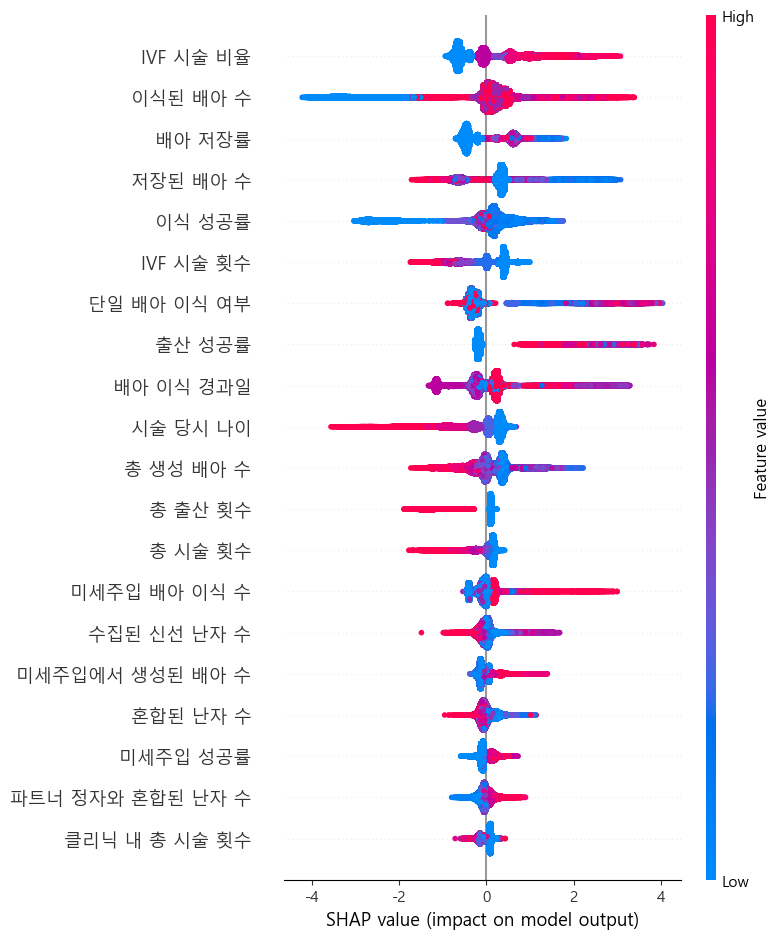

In [27]:
# ✅ SHAP 분석 추가
import shap

# SHAP 값 계산을 위한 모델 선택
explainer = shap.Explainer(models["XGBoost"], X_resampled)
shap_values = explainer(X_resampled)

# SHAP 요약 플롯 생성
shap.summary_plot(shap_values, X_resampled)

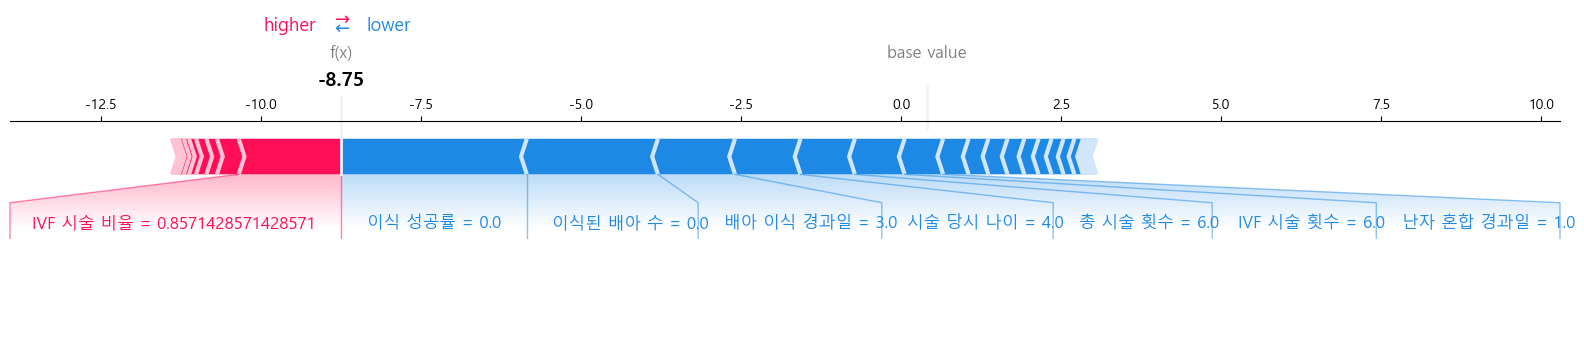

In [31]:
shap.force_plot(explainer.expected_value, shap_values.values[0], X_resampled.iloc[0, :], matplotlib=True)


In [34]:
# SHAP 값을 데이터프레임으로 변환
shap_df = pd.DataFrame(shap_values.values, columns=X_resampled.columns)

# 각 Feature별 평균 SHAP 값 계산 (절대값 기준 중요도)
shap_importance = shap_df.abs().mean().sort_values(ascending=False)

# SHAP 값 출력
print("\n📊 Feature SHAP Values (Mean Absolute Impact)\n")
print(shap_importance)


📊 Feature SHAP Values (Mean Absolute Impact)

IVF 시술 비율           0.687712
이식된 배아 수            0.562209
배아 저장률              0.516546
저장된 배아 수            0.512683
이식 성공률              0.490985
IVF 시술 횟수           0.455780
단일 배아 이식 여부         0.428112
출산 성공률              0.418077
배아 이식 경과일           0.405684
시술 당시 나이            0.380023
총 생성 배아 수           0.345039
총 출산 횟수             0.271714
총 시술 횟수             0.206177
미세주입 배아 이식 수        0.166573
수집된 신선 난자 수         0.145471
미세주입에서 생성된 배아 수     0.133662
혼합된 난자 수            0.124717
미세주입 성공률            0.118105
파트너 정자와 혼합된 난자 수    0.114621
클리닉 내 총 시술 횟수       0.103199
불임 원인 코드            0.092627
해동된 배아 수            0.087237
미세주입 후 저장된 배아 수     0.057429
시술 시기 코드            0.053375
미세주입된 난자 수          0.052963
DI 시술 비율            0.052677
난자 출처               0.052356
불명확 불임 원인           0.051957
총 임신 횟수             0.047883
시술 유형               0.045583
DI 시술 횟수            0.030115
착상 전 유전 진단 사용 여부    0.027875
배란 자극 여부            0.021

In [29]:
# ✅ Soft Voting 앙상블 모델의 Feature Importance
print("\n📊 앙상블 모델 Feature Importance (평균 기반)")
ensemble_feature_importance = np.mean(
    [models[name].feature_importances_ for name in models if hasattr(models[name], "feature_importances_")], axis=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=ensemble_feature_importance[sorted_idx], y=features[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Ensemble Model Feature Importance")
plt.show()


📊 앙상블 모델 Feature Importance (평균 기반)


NameError: name 'sorted_idx' is not defined

<Figure size 1000x600 with 0 Axes>